In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "family_financial_and_transactions_data.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

In [3]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [4]:
df.describe()

,Transaction Date,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,2024-10-16 00:34:31.777259776,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
min,2024-10-01 00:00:00,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,2024-10-08 00:00:00,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,2024-10-16 00:00:00,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,2024-10-24 00:00:00,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,2024-10-31 00:00:00,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000
std,NaN,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304


In [5]:
df.isnull().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

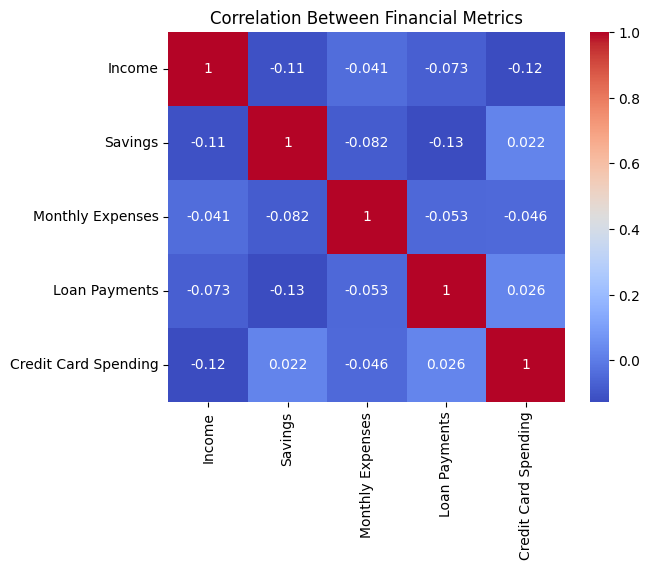

In [6]:
# Clean data
df.dropna(inplace=True)  # Drop missing values
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])  # Parse dates

# Family-level analysis
family_summary = df.groupby('Family ID').agg({
    'Income': 'sum',
    'Savings': 'sum',
    'Monthly Expenses': 'sum',
    'Loan Payments': 'sum',
    'Credit Card Spending': 'sum',
    'Financial Goals Met (%)': 'mean',
    'Dependents': 'nunique' 
}).reset_index()

# Correlation analysis
correlation = df[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Financial Metrics')
plt.show()

In [7]:
print(family_summary.columns)


Index(['Family ID', 'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Financial Goals Met (%)', 'Dependents'],
      dtype='object')


In [8]:
def calculate_financial_score(row):
    income = row['Income']
    savings = row['Savings']
    expenses = row['Monthly Expenses']
    loan_payments = row['Loan Payments']
    credit_card_spending = row['Credit Card Spending']
    financial_goals_met = row['Financial Goals Met (%)']

    if income == 0:
        return 0

    # Scoring components
    savings_score = (savings / income) * 40
    expenses_score = (1 - (expenses / income)) * 20
    loan_score = (1 - (loan_payments / income)) * 15
    credit_card_score = (1 - (credit_card_spending / income)) * 10
    goals_score = (financial_goals_met / 100) * 15

    # Total score
    total_score = savings_score + expenses_score + loan_score + credit_card_score + goals_score
    return max(0, min(100, total_score))  # Ensure score is between 0 and 100

# Apply scoring model
family_summary['Financial Score'] = family_summary.apply(calculate_financial_score, axis=1)


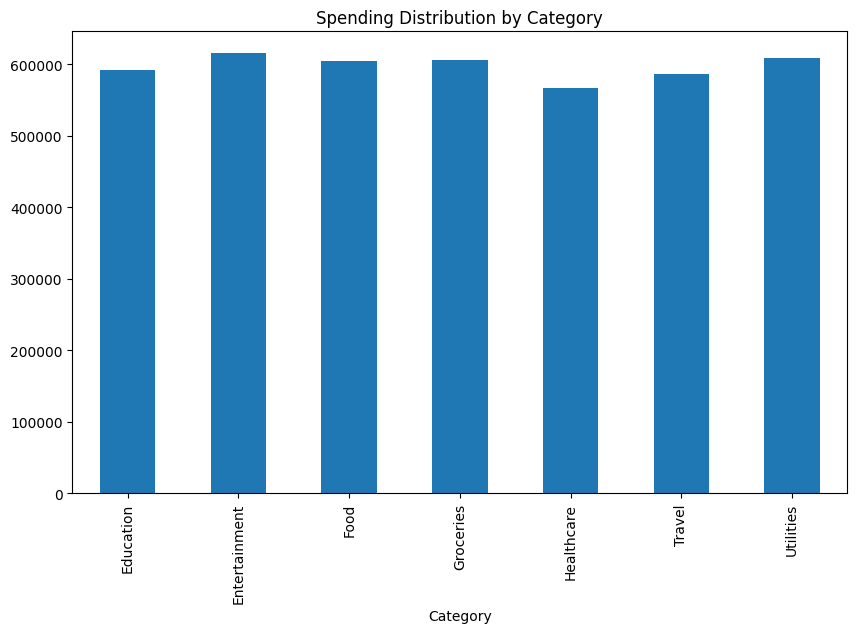

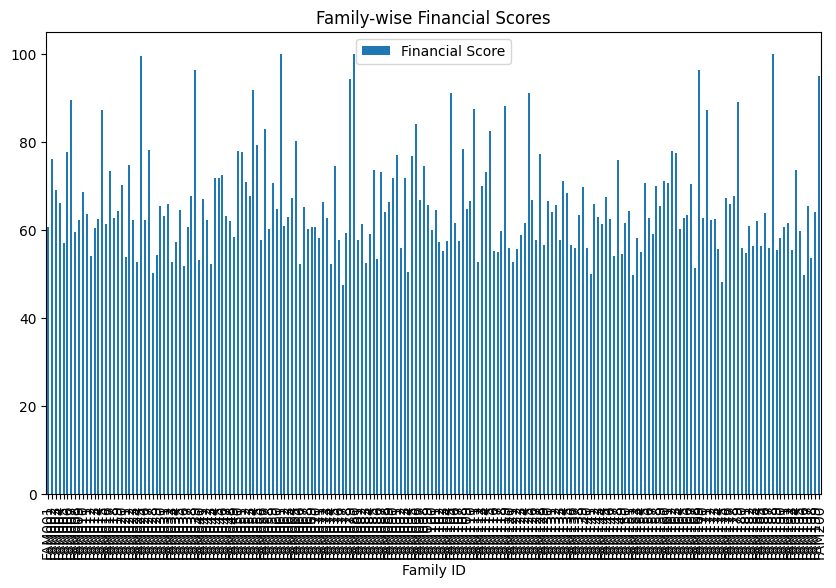

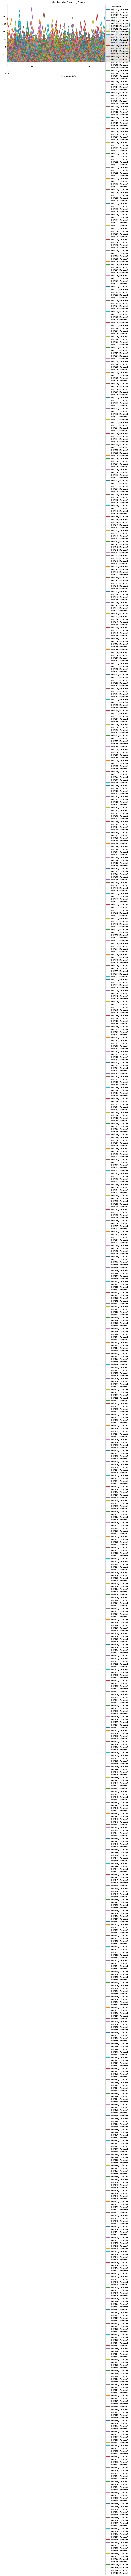

In [9]:
# Spending distribution
spending_distribution = df.groupby('Category')['Amount'].sum()
spending_distribution.plot(kind='bar', title='Spending Distribution by Category', figsize=(10, 6))
plt.show()

# Family-wise financial scores
family_summary.plot(x='Family ID', y='Financial Score', kind='bar', title='Family-wise Financial Scores', figsize=(10, 6))
plt.show()

# Member-wise spending trends
member_spending = df.groupby(['Member ID', 'Transaction Date'])['Amount'].sum().unstack(fill_value=0)
member_spending.T.plot(title='Member-wise Spending Trends', figsize=(12, 6))
plt.show()


KeyboardInterrupt



In [11]:
family_summary['Income_to_Expense_Ratio'] = df['Income'] / (df['Monthly Expenses'] + 1)
family_summary['Savings_to_Income_Ratio'] = df['Savings'] / (df['Income'] + 1)
family_summary['Debt_to_Income_Ratio'] = df['Loan Payments'] / (df['Income'] + 1)
family_summary['Credit_to_Income_Ratio'] = df['Credit Card Spending'] / (df['Income'] + 1)
family_summary['Cumulative_Spending'] = df['Monthly Expenses'] + df['Loan Payments'] + df['Credit Card Spending']
family_summary['Dependents_to_Income_Ratio'] = df['Dependents'] / (df['Income'] + 1)
family_summary['Financial_Goal_Effectiveness'] = (df['Financial Goals Met (%)'] * df['Savings']) / (df['Income'] + 1)
family_summary['Remaining_Income'] = df['Income'] - df['Monthly Expenses']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# X = family_summary[['Income', 'Savings', 'Loan Payments', 
#                   'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)']]
y = family_summary['Monthly Expenses']
X = family_summary[['Income', 'Savings', 'Loan Payments', 'Credit Card Spending']]

print(y)

0      537633
1      495440
2      248254
3      341145
4      517440
        ...  
195    438092
196    122797
197    330220
198    429624
199    446784
Name: Monthly Expenses, Length: 200, dtype: int64


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 56, test_size=0.2)

In [15]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge()
}

# Fit and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)
    # Predict on the test set
    predictions = model.predict(x_test_scaled)
    # Calculate R2 score
    r2 = r2_score(y_test, predictions) * 100
    # Store the results
    results[name] = r2

# Display the R2 scores
for name, r2 in results.items():
    print(f"{name}: {r2:.2f}%")


Linear Regression: 26.54%
Random Forest: 19.22%
Ridge Regression: 26.52%


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_tree = grid_search.best_estimator_
print(f"Best Decision Tree R²: {r2_score(y_test, best_tree.predict(x_test)) * 100:.2f}%")

Best Decision Tree R²: 3.76%


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)
rf.fit(x_train, y_train)
rf_r2 = r2_score(y_test, rf.predict(x_test)) * 100
print(f"Random Forest R²: {rf_r2:.2f}%")

Random Forest R²: 23.88%


In [19]:
feature_importances = rf.feature_importances_
for feature, importance in zip(x_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Income: 0.4119
Savings: 0.1550
Loan Payments: 0.2224
Credit Card Spending: 0.2107
